In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.max_columns', None)


# Load and explore data

In [4]:
#SOULD WE DROP NAME AND KEEP ONLY ANIME ID? 
#THE CLASTER WILL BE BUILT ON ANIME ID AND WHEN PRODUCING RECOMENDATION WE WILL INVERSE_TRANSCODE THE ID INTO NAME?

In [5]:
anime_sample = pd.read_csv('../raw_data/merged_df_sample.csv')

In [6]:
anime_sample.head()

,anime_id,Name,Genres,user_id,rating
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",11550,8
1,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",247878,10
2,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",194759,9
3,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",298511,6
4,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",289146,10


In [7]:
new_df = pd.concat([anime_sample.drop(columns = 'Genres'), anime_sample['Genres'].str.get_dummies(sep=", ")], 1)

/tmp/ipykernel_6760/327506137.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  new_df = pd.concat([anime_sample.drop(columns = 'Genres'), anime_sample['Genres'].str.get_dummies(sep=", ")], 1)


In [8]:
new_df.head()

,anime_id,Name,user_id,rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,1,Cowboy Bebop,11550,8,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,1,Cowboy Bebop,247878,10,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,Cowboy Bebop,194759,9,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,5,Cowboy Bebop: Tengoku no Tobira,298511,6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,6,Trigun,289146,10,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [5]:
anime_sample.describe()

,anime_id,user_id,rating
count,6144.000000,6144.000000,6144.000000
mean,15996.281576,176476.612305,7.478190
std,13413.332078,101915.282075,1.719414
min,1.000000,123.000000,1.000000
25%,3092.000000,88484.250000,7.000000
50%,11887.000000,175956.500000,8.000000
75%,30015.000000,263932.250000,9.000000
max,47398.000000,353395.000000,10.000000


In [6]:
anime_sample.columns

Index(['anime_id', 'Name', 'Genres', 'user_id', 'rating'], dtype='object')

In [7]:
anime_sample.Name.nunique()

2557

In [8]:
anime_sample.Name.unique().shape

(2557,)

In [9]:
anime_sample.Genres.nunique()

1656

In [10]:
anime_sample.Genres.unique()

array(['Action, Adventure, Comedy, Drama, Sci-Fi, Space',
       'Action, Drama, Mystery, Sci-Fi, Space',
       'Action, Sci-Fi, Adventure, Comedy, Drama, Shounen', ...,
       'Comedy, Sports, School',
       'Action, Adventure, Harem, Ecchi, Fantasy',
       'Slice of Life, Comedy, Supernatural'], dtype=object)

In [26]:
anime_sample.columns

Index(['anime_id', 'Name', 'Genres', 'user_id', 'rating'], dtype='object')

# Cleaning

## anime_id 

<AxesSubplot:>

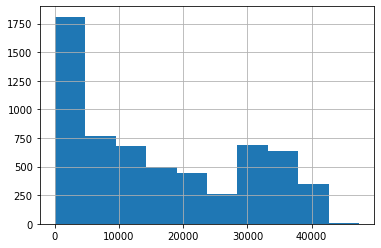

In [131]:
anime_sample.anime_id.hist()

In [10]:
anime_sample.describe()

,anime_id,user_id,rating
count,6144.000000,6144.000000,6144.000000
mean,15996.281576,176476.612305,7.478190
std,13413.332078,101915.282075,1.719414
min,1.000000,123.000000,1.000000
25%,3092.000000,88484.250000,7.000000
50%,11887.000000,175956.500000,8.000000
75%,30015.000000,263932.250000,9.000000
max,47398.000000,353395.000000,10.000000


In [124]:
anime_id_array = np.array([anime_sample.anime_id])

In [125]:
anime_id_scaler = MinMaxScaler()

In [126]:
anime_id_scaler.fit(anime_id_array)

MinMaxScaler()

In [127]:
print(anime_id_scaler.data_range_)

[0. 0. 0. ... 0. 0. 0.]


In [128]:
print(anime_id_scaler.transform(anime_id_array)[0][0])

0.0


In [129]:
print(anime_id_scaler.transform(anime_id_array))

[[0. 0. 0. ... 0. 0. 0.]]


## Name feature

In [14]:
anime_reduced_clean.Name[3]

'Cowboy Bebop: Tengoku no Tobira'

In [15]:
anime_reduced_clean.Name[3].replace(' ','').isalpha()
#non letters is in string

False

In [16]:
anime_reduced_clean.Name[4]

'Trigun'

In [17]:
anime_reduced_clean.Name[4].replace(' ','').isalpha()
#True string contains only letters

True

In [20]:
anime_reduced_clean.Name[6142]

'SK∞'

In [19]:
anime_reduced_clean.Name[6142].replace(' ','').isdigit()


False

## Genres feature

In [24]:
# recome commas from genres, drop genres, ohe encode genres
genres = anime_sample['Genres'].str.get_dummies(sep=", ")

In [25]:
genres

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6140,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
6141,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
6142,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## user_id

<AxesSubplot:>

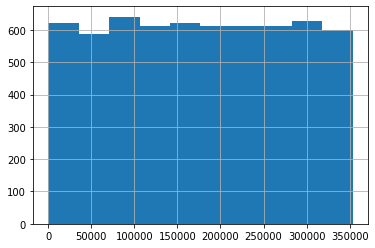

In [132]:
anime_sample.user_id.hist()

In [30]:
anime_sample.user_id

0        11550
1       247878
2       194759
3       298511
4       289146
         ...  
6139    145239
6140    140338
6141    349677
6142    197815
6143    185756
Name: user_id, Length: 6144, dtype: int64

In [51]:
#scaling 
user_id_array = np.array([anime_sample.user_id])

In [52]:
user_id_scaler = MinMaxScaler()

In [53]:
user_id_scaler.fit(user_id_array)

MinMaxScaler()

In [54]:
user_id_scaler.transform(user_id_array)

array([[0., 0., 0., ..., 0., 0., 0.]])

## rating

<AxesSubplot:>

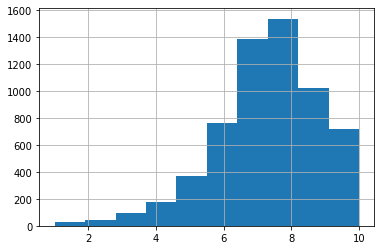

In [133]:
anime_sample.rating.hist()

In [31]:
anime_sample.rating

0        8
1       10
2        9
3        6
4       10
        ..
6139     5
6140     9
6141    10
6142     8
6143     5
Name: rating, Length: 6144, dtype: int64

In [56]:
#scaling 
rating_array = np.array([anime_sample.rating])
rating_scaler = MinMaxScaler()
rating_scaler.fit_transform(rating_array)

array([[0., 0., 0., ..., 0., 0., 0.]])

# Merge all processed features in one dataset